In [9]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [10]:
df_original = pd.read_csv('players_stats_by_season_full_details.csv')

In [11]:
#filter out 24 players with 0 total points

df = df_original[df_original['PTS']!=0].copy()

In [12]:
#select a subset of data for out analysis
#seasons from 2012 to 2020
#selected leagues: NBA, euroleague, Spanish, Turkish, Italian

df = df[df['Season'].isin(['2012 - 2013','2013 - 2014','2014 - 2015','2015 - 2016','2016 - 2017','2017 - 2018','2018 - 2019','2019 - 2020'])]
df = df[df['League'].isin(['NBA','Euroleague','Spanish-ACB','Turkish-BSL','Italian-Lega-Basket-Serie-A'])]

In [13]:
df.sample(5).T

,29940,21534,29766,33762,28324
League,NBA,NBA,NBA,NBA,Italian-Lega-Basket-Serie-A
Season,2013 - 2014,2015 - 2016,2013 - 2014,2012 - 2013,2014 - 2015
Stage,Playoffs,Regular_Season,Regular_Season,Regular_Season,International
Player,Terrence Jones,JaMychal Green,Matt Barnes,Kosta Koufos,Dejan Ivanov
Team,HOU,MEM,LAC,DEN,NBB
GP,6,78,63,81,6
MIN,138.1,1446.1,1735.3,1817.1,117
FGM,20,230,231,295,12
FGA,39,495,527,508,26
3PM,0,15,97,0,1


__Transform total stats to per game stats__

In [14]:
df_standardized = df.copy()

In [15]:
transform_list = df_standardized.columns[6:22]
transform_list

Index(['MIN', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB',
       'DRB', 'REB', 'AST', 'STL', 'BLK', 'PTS'],
      dtype='object')

In [16]:
for col in transform_list:
    df_standardized[col] = np.round(df_standardized[col] / df_standardized['GP'], 2)

__seems like predictor names including number cause problem in smf.ols so I renamed these 2__

In [17]:
df_standardized.rename(columns = {'3PM':'ThreePM', '3PA':'ThreePA'}, inplace = True)

In [18]:
df_standardized.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', 'ThreePM', 'ThreePA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB',
       'REB', 'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month',
       'birth_date', 'height', 'height_cm', 'weight', 'weight_kg',
       'nationality', 'high_school'],
      dtype='object')

# Explanatory analysis

In [19]:
df_standardized.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', 'ThreePM', 'ThreePA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB',
       'REB', 'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month',
       'birth_date', 'height', 'height_cm', 'weight', 'weight_kg',
       'nationality', 'high_school'],
      dtype='object')

## distributions for numerical variables 

/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


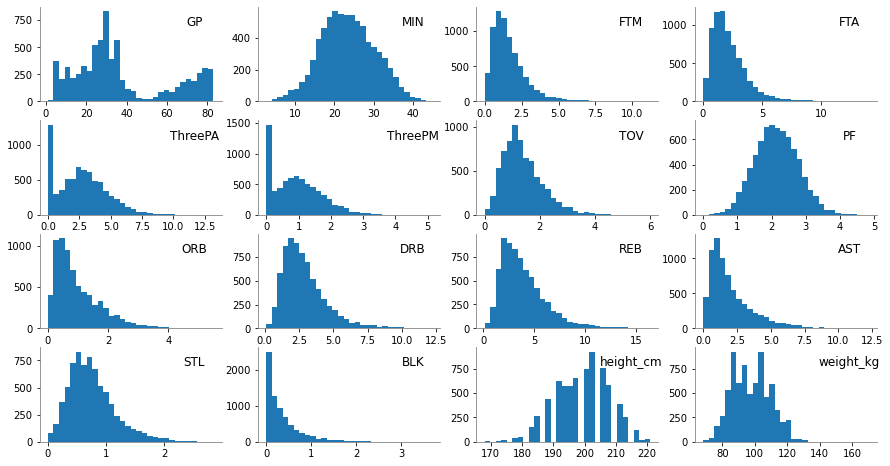

In [20]:
numerical_variables = ['GP', 'MIN', 'FTM', 'FTA', 'ThreePA', 'ThreePM', 'TOV', 'PF', 
                       'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK', 'height_cm', 'weight_kg']

fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, sharey=False, figsize=(15,8))
axes_list = [item for sublist in axes for item in sublist] 

for column in numerical_variables:
    lg = '#808080'
    ax = axes_list.pop(0)
    ax.hist(df_standardized[column], bins=30);
    ax.text(0.85, 0.8, column, ha='center', fontsize=12, transform=ax.transAxes)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color(lg)
    ax.spines["left"].set_color(lg)

# Now use the matplotlib .remove() method to delete anything we didn't use
for ax in axes_list:
    ax.remove()

The distribution of FTM and FTA is very similar.   
The distribution of ThreePA and ThreePM is very similar. 

## distributions for categorical variables

In [21]:
def bar_categorical(column):
    lg = '#808080'
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
    ax.barh(df_standardized[column].value_counts().index, df_standardized[column].value_counts().values, 
            align='center', height = .6)
    ax.invert_yaxis()
    ax.text(0.5, 1.05, f'Distribution for {column}', ha='center', fontsize=14, transform=ax.transAxes)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color(lg)
    ax.spines["left"].set_color(lg)

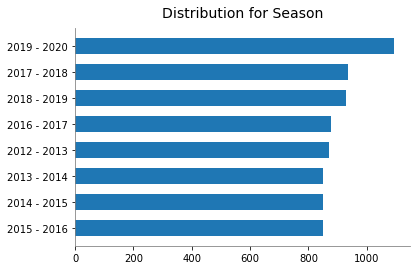

In [22]:
bar_categorical('Season')

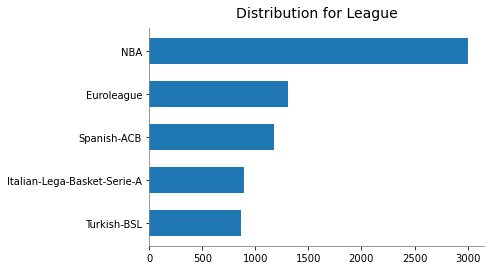

In [23]:
bar_categorical('League')

## Relationship between variables

### league and PTS

In [24]:
def violinplot(x, y):
    fig, ax = plt.subplots(figsize= (10, 5))
    sns.violinplot(ax=ax, data=df_standardized, x=x, y=y, color='gray')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color(lg)
    ax.spines["left"].set_color(lg) 

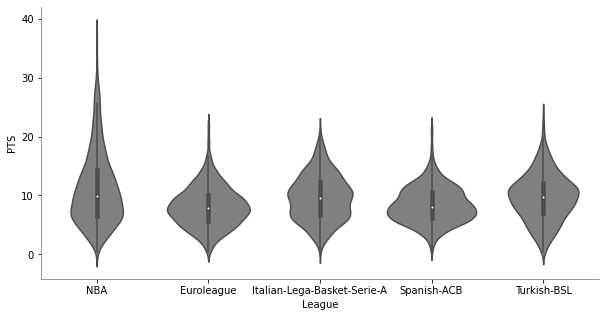

In [25]:
violinplot(x='League', y='PTS')

Different league has different distribution of PTS.  
For example, PTS of NBA has a much larger range than of other league.   
League seems to be relevant to PTS.

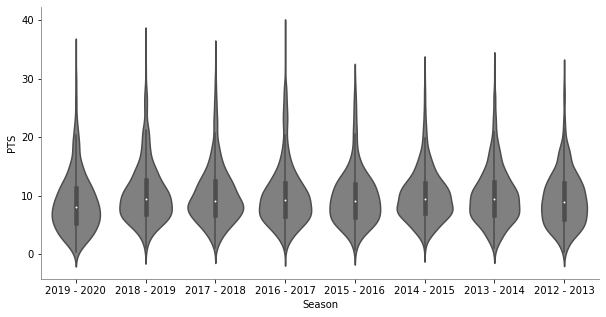

In [26]:
violinplot(x='Season', y='PTS')

For different Season, distribution of PTS doesn't vary too much.  
Season may or may not be relevant to PTS.

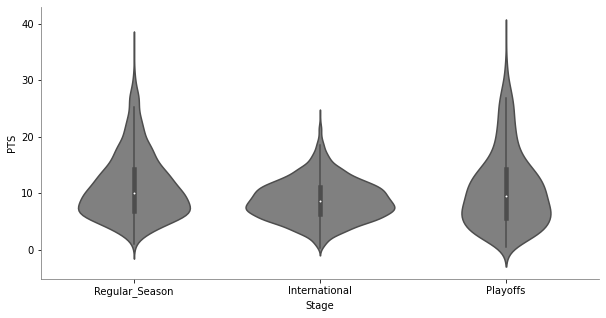

In [27]:
violinplot(x='Stage', y='PTS')

For different Stage, distribution of PTS is different.  
For international stage, PTS are gathered around 10, and the range of PTS is smaller.  
For regular season and playoffs, the range of PTS are much larger.   

# Preliminary model selection

__Delete some variables: birthday is irrelavant; keep height_cm, weight_kg and drop height & weight; drop high school as there's too many null value; drop nationality as there're too many of them, keep it in the model would jeopardize interpretation__

In [28]:
df_standardized.drop(['birth_year', 'birth_month','birth_date', 'height', 'weight', 'high_school','nationality'],axis=1,inplace=True)

__Delete information that's too specific like player name and which team they are on__

In [29]:
df_standardized.drop(['Player','Team'],axis=1,inplace=True)

In [30]:
df_standardized.dropna(inplace=True)

## Check multicollinearity

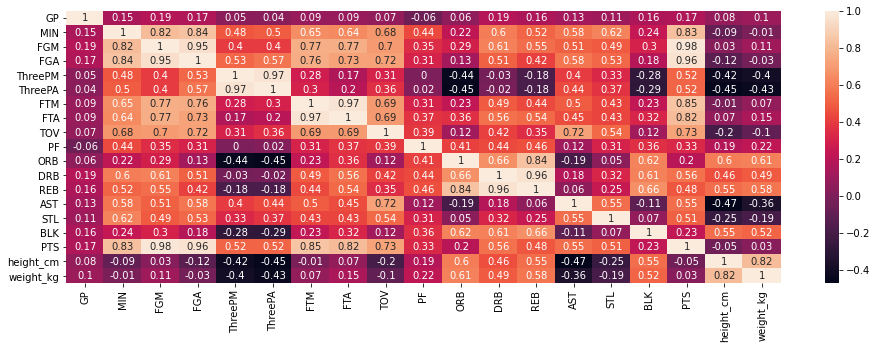

In [31]:
correlation_matrix = df_standardized.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)

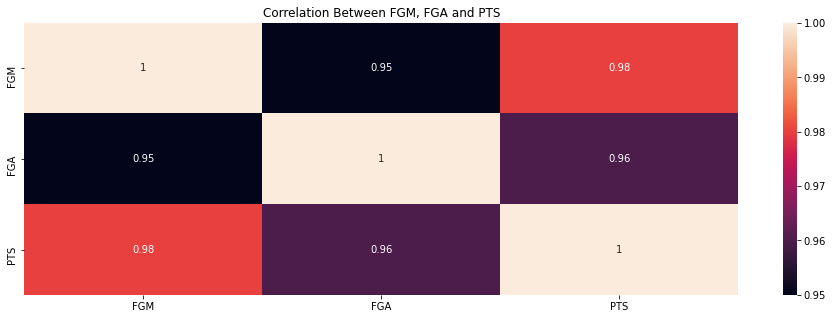

In [32]:
a = df_standardized[['FGM','FGA','PTS']].corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=a, annot=True)
plt.title('Correlation Between FGM, FGA and PTS')
plt.show()

# Initial Fitting? 


In [33]:
m = smf.ols('PTS~ C(League)+C(Season)+C(Stage)+GP+MIN+ThreePM+ThreePA+FTM+FTA+TOV+PF+ORB+DRB+REB+AST+STL+BLK+height_cm+weight_kg',data=df_standardized).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     2379.
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:05:53   Log-Likelihood:                -13376.
No. Observations:                7232   AIC:                         2.681e+04
Df Residuals:                    7203   BIC:                         2.701e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -3.0498      0.726     -4.200      0.000      -4.473      -1.626
C(League)[T.Italian-Lega-Basket-Serie-A]    -0.1223      0.071     -1.712      0.087      -0.262       0.018
C(League)[T.NBA]                             0.2916      0.046      6.302      0.000       0.201       0.382
C(League)[T.Spanish-ACB]                    -0.0294      0.066     -0.445      0.656      -0.159       0.100
C(League)[T.Turkish-BSL]                     0.0485      0.070      0.696      0.486      -0.088       0.185
C(Season)[T.2013 - 2014]                     0.0457      0.075      0.612      0.540      -0.101       0.192
C(Season)[T.2014 - 2015]                     0.0716      0.075      0.954      0.340      -0.075       0.219
C(Season)[T.2015 - 2016]                     0.0273      0.075      0.364      0.716      -0.119       0.174
C(Season)[T.2016 - 2017]                     0.1980      0.075      2.654      0.008       0.052       0.344
C(Season)[T.2017 - 2018]                     0.3772      0.074      5.095      0.000       0.232       0.522
C(Season)[T.2018 - 2019]                     0.4435      0.075      5.885      0.000       0.296       0.591
C(Season)[T.2019 - 2020]                     0.4174      0.078      5.334      0.000       0.264       0.571
C(Stage)[T.Playoffs]                        -0.0234      0.077     -0.302      0.762      -0.175       0.128
C(Stage)[T.Regular_Season]                   0.3151      0.099      3.167      0.002       0.120       0.510
GP                                          -0.0001      0.003     -0.050      0.960      -0.005       0.005
MIN                                          0.2197      0.006     38.098      0.000       0.208       0.231
ThreePM                                      2.8502      0.097     29.374      0.000       2.660       3.040
ThreePA                                     -0.4787      0.040    -11.954      0.000      -0.557      -0.400
FTM                                          1.7099      0.070     24.543      0.000       1.573       1.846
FTA                                          0.1621      0.058      2.772      0.006       0.047       0.277
TOV                                          1.0021      0.050     20.035      0.000       0.904       1.100
PF                                          -0.3821      0.036    -10.498      0.000      -0.454      -0.311
ORB                                          2.0081      3.910      0.514      0.608      -5.657       9.673
DRB                                          1.5709      3.910      0.402      0.688      -6.095       9.236
REB                                         -1.5460      3.910     -0.395      0.693      -9.211       6.119
AST                            

__I decided to delete FGM, FGA as these two variables almost just explicitly tell you how many points a player score. we can confirm that in the correlation matrix as well__

In [34]:
df_standardized.drop(['FGM','FGA'],axis=1,inplace=True)

In [35]:
df_standardized.columns

Index(['League', 'Season', 'Stage', 'GP', 'MIN', 'ThreePM', 'ThreePA', 'FTM',
       'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK', 'PTS',
       'height_cm', 'weight_kg'],
      dtype='object')

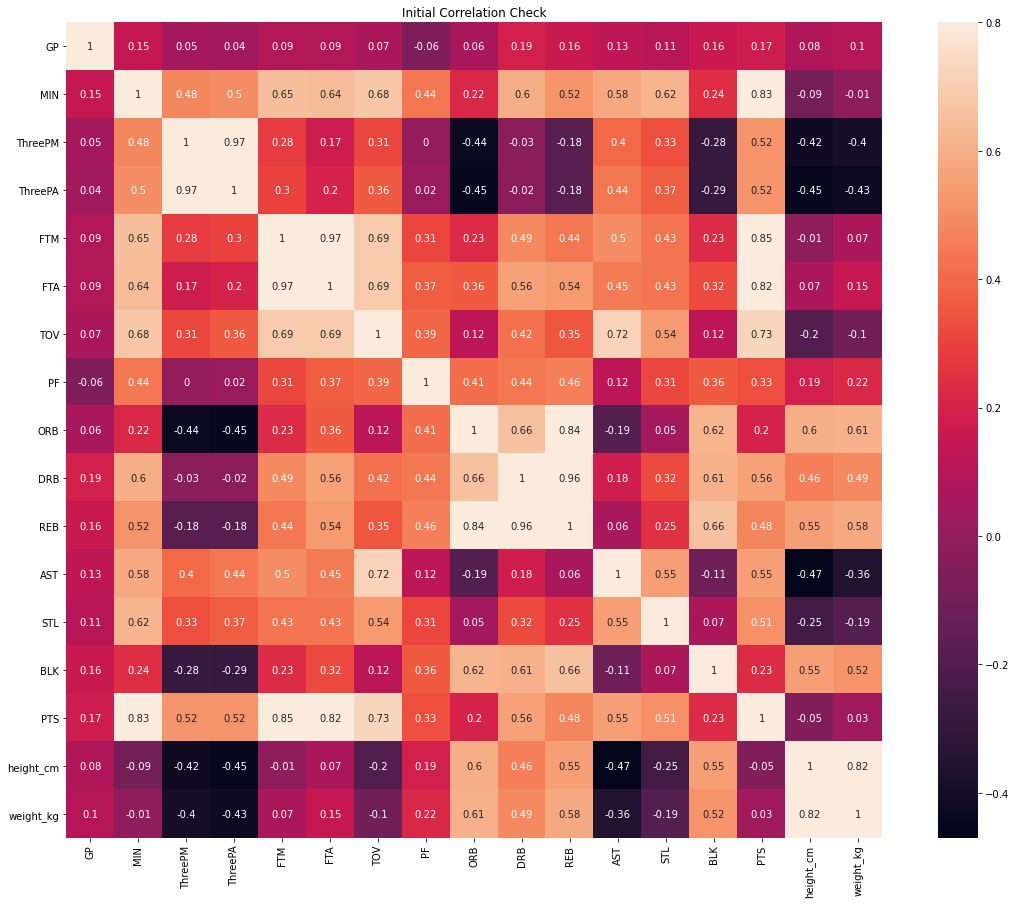

In [36]:
correlation_matrix = df_standardized.corr().round(2)
plt.figure(figsize = (20,15))
sns.heatmap(data=correlation_matrix, vmax=.8, square=True, annot=True)
plt.title("Initial Correlation Check")
plt.show()

__we can see that ORB, DRB, REB are quite correlated with each other; This is no surprise as ORB + DRB = REB__

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('PTS~ C(League)+C(Season)+C(Stage)+GP+MIN+ThreePM+ThreePA+FTM+FTA+TOV+PF+ORB+DRB+REB+AST+STL+BLK+height_cm+weight_kg',data=df_standardized, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

      VIF Factor                                  features
0   1.604997e+03                                 Intercept
1   1.687274e+00  C(League)[T.Italian-Lega-Basket-Serie-A]
2            inf                          C(League)[T.NBA]
3   1.808102e+00                  C(League)[T.Spanish-ACB]
4   1.531581e+00                  C(League)[T.Turkish-BSL]
5   1.758790e+00                  C(Season)[T.2013 - 2014]
6   1.773674e+00                  C(Season)[T.2014 - 2015]
7   1.765780e+00                  C(Season)[T.2015 - 2016]
8   1.807465e+00                  C(Season)[T.2016 - 2017]
9   1.877832e+00                  C(Season)[T.2017 - 2018]
10  1.929894e+00                  C(Season)[T.2018 - 2019]
11  2.366100e+00                  C(Season)[T.2019 - 2020]
12           inf                      C(Stage)[T.Playoffs]
13           inf                C(Stage)[T.Regular_Season]
14  1.108607e+01                                        GP
15  4.780737e+00                                       M

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


__Stage('Playoffs' and 'Regular_Season') and League('NBA') have inf VIF. I guess this is due to 'Playoffs' and Regular_Season' in 'Stage' are terms only for the NBA. No wonder they show perfect correlation__

__Seems the only solution is to drop 'Stage'__

In [38]:
df_standardized.drop(['Stage'],axis=1,inplace=True)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('PTS~ C(League)+C(Season)+GP+MIN+ThreePM+ThreePA+FTM+FTA+TOV+PF+ORB+DRB+REB+AST+STL+BLK+height_cm+weight_kg',data=df_standardized, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

       VIF Factor                                  features
0     1593.781556                                 Intercept
1        1.626865  C(League)[T.Italian-Lega-Basket-Serie-A]
2        2.712913                          C(League)[T.NBA]
3        1.647200                  C(League)[T.Spanish-ACB]
4        1.511858                  C(League)[T.Turkish-BSL]
5        1.758231                  C(Season)[T.2013 - 2014]
6        1.771248                  C(Season)[T.2014 - 2015]
7        1.765356                  C(Season)[T.2015 - 2016]
8        1.806417                  C(Season)[T.2016 - 2017]
9        1.873253                  C(Season)[T.2017 - 2018]
10       1.912542                  C(Season)[T.2018 - 2019]
11       2.062258                  C(Season)[T.2019 - 2020]
12       1.385407                                        GP
13       4.765383                                       MIN
14      16.876450                                   ThreePM
15      18.958515                       

__Stage('Playoffs' and 'Regular_Season') and League('NBA') have inf VIF. I guess this is due to 'Playoffs' and Regular_Season' in 'Stage' are terms only for the NBA. No wonder they show perfect correlation__

__Seems the only solution is to drop 'Stage'__

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('PTS~ C(League)+C(Season)+GP+MIN+ThreePM+ThreePA+FTM+FTA+TOV+PF+ORB+DRB+REB+AST+STL+BLK+height_cm+weight_kg',data=df_standardized, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

       VIF Factor                                  features
0     1593.781556                                 Intercept
1        1.626865  C(League)[T.Italian-Lega-Basket-Serie-A]
2        2.712913                          C(League)[T.NBA]
3        1.647200                  C(League)[T.Spanish-ACB]
4        1.511858                  C(League)[T.Turkish-BSL]
5        1.758231                  C(Season)[T.2013 - 2014]
6        1.771248                  C(Season)[T.2014 - 2015]
7        1.765356                  C(Season)[T.2015 - 2016]
8        1.806417                  C(Season)[T.2016 - 2017]
9        1.873253                  C(Season)[T.2017 - 2018]
10       1.912542                  C(Season)[T.2018 - 2019]
11       2.062258                  C(Season)[T.2019 - 2020]
12       1.385407                                        GP
13       4.765383                                       MIN
14      16.876450                                   ThreePM
15      18.958515                       

__Much better. but now as expected ORB, DRB and REB shows strong multicollinearity. I'd want to keep DRB as it's most correlated to PTS according to correlation matrix.__

__Other than that, 3PM and 3PA & FTM and FTA are also quite correlated pairs. I decided to keep 3PA and FTA, because similar to FGM, 3PM and FTM are literally telling you how many goals a player score__

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('PTS~C(League)+C(Season)+GP+MIN+ThreePA+FTA+TOV+PF+DRB+AST+STL+BLK+height_cm+weight_kg',data=df_standardized, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

     VIF Factor                                  features
0   1577.894558                                 Intercept
1      1.616599  C(League)[T.Italian-Lega-Basket-Serie-A]
2      2.642572                          C(League)[T.NBA]
3      1.641077                  C(League)[T.Spanish-ACB]
4      1.499849                  C(League)[T.Turkish-BSL]
5      1.755876                  C(Season)[T.2013 - 2014]
6      1.766982                  C(Season)[T.2014 - 2015]
7      1.764361                  C(Season)[T.2015 - 2016]
8      1.804801                  C(Season)[T.2016 - 2017]
9      1.871504                  C(Season)[T.2017 - 2018]
10     1.902326                  C(Season)[T.2018 - 2019]
11     2.055736                  C(Season)[T.2019 - 2020]
12     1.365821                                        GP
13     4.581121                                       MIN
14     2.108504                                   ThreePA
15     2.499077                                       FTA
16     4.04545

## ALL GOOD!

# Initial model

In [42]:
model =smf.ols('PTS~C(League)+C(Season)+GP+MIN+ThreePA+FTA+TOV+PF+DRB+AST+STL+BLK+height_cm+weight_kg',data=df_standardized).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     2307.
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:05:55   Log-Likelihood:                -14111.
No. Observations:                7232   AIC:                         2.827e+04
Df Residuals:                    7208   BIC:                         2.844e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -4.8678      0.797     -6.110      0.000      -6.430      -3.306
C(League)[T.Italian-Lega-Basket-Serie-A]    -0.3238      0.077     -4.186      0.000      -0.475      -0.172
C(League)[T.NBA]                             0.1191      0.066      1.801      0.072      -0.011       0.249
C(League)[T.Spanish-ACB]                    -0.1244      0.070     -1.785      0.074      -0.261       0.012
C(League)[T.Turkish-BSL]                    -0.1311      0.076     -1.716      0.086      -0.281       0.019
C(Season)[T.2013 - 2014]                     0.0617      0.083      0.747      0.455      -0.100       0.224
C(Season)[T.2014 - 2015]                     0.0196      0.083      0.236      0.813      -0.143       0.182
C(Season)[T.2015 - 2016]                     0.0075      0.083      0.090      0.928      -0.155       0.170
C(Season)[T.2016 - 2017]                     0.2271      0.083      2.752      0.006       0.065       0.389
C(Season)[T.2017 - 2018]                     0.3836      0.082      4.690      0.000       0.223       0.544
C(Season)[T.2018 - 2019]                     0.4174      0.083      5.041      0.000       0.255       0.580
C(Season)[T.2019 - 2020]                     0.4889      0.081      6.057      0.000       0.331       0.647
GP                                           0.0085      0.001      8.428      0.000       0.007       0.010
MIN                                          0.2458      0.006     39.352      0.000       0.234       0.258
ThreePA                                      0.6393      0.015     43.328      0.000       0.610       0.668
FTA                                          1.5261      0.020     75.072      0.000       1.486       1.566
TOV                                          0.8512      0.055     15.518      0.000       0.744       0.959
PF                                          -0.3954      0.040     -9.887      0.000      -0.474      -0.317
DRB                                          0.0393      0.023      1.677      0.094      -0.007       0.085
AST                                         -0.0854      0.023     -3.751      0.000      -0.130      -0.041
STL                                         -0.3903      0.068     -5.738      0.000      -0.524      -0.257
BLK                                          0.2418      0.069      3.516      0.000       0.107       0.377
height_cm                                    0.0059      0.005      1.265      0.206      -0.003       0.015
weight_kg                                    0.0207      0.003      6.444      0.000       0.014       0.027
==============================================================================
Omnibus:                      420.133   Durbin-Watson:       

## Check influential points

In [43]:
infl = model.get_influence()

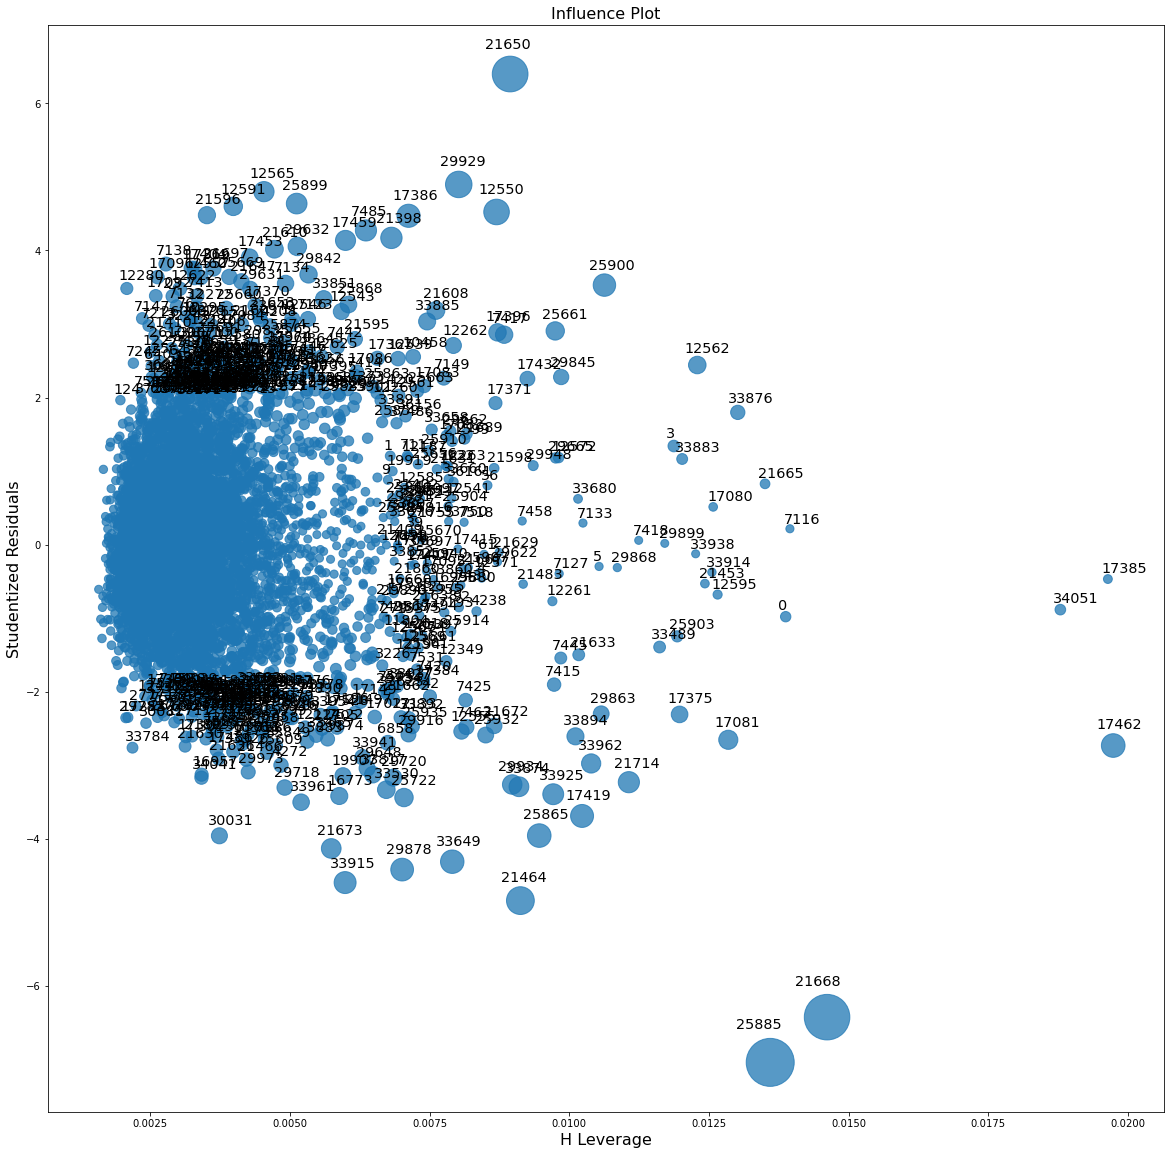

In [44]:
#graphical representation of the influences()
fig, ax = plt.subplots(figsize=(20,20))
fig=sm.graphics.influence_plot(model,ax=ax, criterion="cooks") 
#size of points are given by cook's dist value
#the points with big size and out of the (-3,3) should raise a flag

In [45]:
# threshold externally studentized residuals to identify influential points
import scipy
n = len(df_standardized)
p = len(model.params)
alpha = 0.05

# get the critical value
threshold_stud = scipy.stats.t.ppf(1-alpha/2, df=n-p-1)  

# get a list of studs(e_i), i = 1, 2, ..., n
infl = model.get_influence()
reg_studs = infl.resid_studentized_external         

# get a list of boolean value, indicating if studs(e_i) > threshold_stud
atyp_stud = np.abs(reg_studs) > threshold_stud           

# which ones?
obs_numbers_studs = df_standardized.index[atyp_stud]  # observation numbers
studs_res = reg_studs[atyp_stud]         # external studentized residual values
#orig_res = res[atyp_stud].values         # original residual values

d = {'index': obs_numbers_studs, 'studentized residual': studs_res}
df_display = pd.DataFrame(d)
df_display.set_index('index')

,studentized residual
index,
6,2.057761
8,2.260830
10,3.049296
11,2.998523
13,2.608736
...,...
37219,2.069668
37232,1.978889
37243,2.187126


In [46]:
# Cook's distance: no flags, this is a pretty "loose" rule
inflsum = infl.summary_frame()
reg_cook = inflsum.cooks_d           # cook's distance value
atyp_cook = np.abs(reg_cook) >= 4/n  # identity the observations that might be influential

# which ones?
obs_numbers_cook = df_standardized.index[atyp_cook]  # observation numbers
obs_cook = reg_cook[atyp_cook]          # cook's distances of influential points

d = {'index': obs_numbers_cook, "cook's distances": obs_cook}
df_display = pd.DataFrame(d)
df_display.set_index('index')

,cook's distances
index,
0,0.000563
3,0.000900
6,0.000862
7,0.000777
8,0.000599
...,...
37243,0.000611
37486,0.000790
37487,0.000880


In [47]:
# find the index of those observations that were both identified as influential points 
# from externally studentized residuals and Cook's distance
delete = obs_numbers_studs & obs_numbers_cook
delete

Int64Index([    6,     8,    10,    11,    13,    15,    21,    23,    25,
               31,
            ...
            33987, 33998, 34003, 34041, 34054, 36164, 36174, 37217, 37243,
            37487],
           dtype='int64', length=367)

In [48]:
"""
#threshold externally studentized residuals
import scipy
n=7232
p=23
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
infl = model.get_influence()
reg_studs=infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud
print(f'Number of observations: {len(atyp_stud[atyp_stud==True])}')

inflsum=infl.summary_frame()
reg_cook=inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n
print(f'Number of observations: {len(atyp_cook[atyp_cook==True])}')


l1 = np.array(atyp_cook.index[atyp_cook])
l2 = np.where(atyp_stud)[0]
delete = np.intersect1d(l1,l2)
delete
""";

## Hetereoscedasticity

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

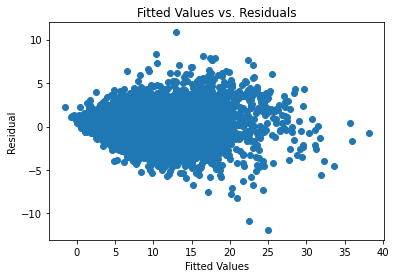

In [49]:
p = model.fittedvalues
res = model.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

__Bad. Looks like funnel shape__

In [50]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 1092.298628987966, 'LM-Test p-value': 3.055097998977559e-216}


__Heteroskedasticity exists__

In [51]:
df_standardized['log_PTS']=np.log(df_standardized['PTS'])

In [52]:
model_1 =smf.ols('log_PTS~ C(League)+C(Season)+GP+ThreePA+FTA+TOV+MIN+PF+DRB+AST+STL+BLK+height_cm+weight_kg',data=df_standardized).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_PTS   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1346.
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:07:01   Log-Likelihood:                 308.96
No. Observations:                7232   AIC:                            -569.9
Df Residuals:                    7208   BIC:                            -404.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.3682      0.108      3.394      0.001       0.156       0.581
C(League)[T.Italian-Lega-Basket-Serie-A]    -0.0501      0.011     -4.759      0.000      -0.071      -0.029
C(League)[T.NBA]                            -0.1130      0.009    -12.538      0.000      -0.131      -0.095
C(League)[T.Spanish-ACB]                     0.0132      0.009      1.391      0.164      -0.005       0.032
C(League)[T.Turkish-BSL]                    -0.0329      0.010     -3.168      0.002      -0.053      -0.013
C(Season)[T.2013 - 2014]                     0.0263      0.011      2.342      0.019       0.004       0.048
C(Season)[T.2014 - 2015]                     0.0534      0.011      4.732      0.000       0.031       0.075
C(Season)[T.2015 - 2016]                     0.0372      0.011      3.297      0.001       0.015       0.059
C(Season)[T.2016 - 2017]                     0.0641      0.011      5.704      0.000       0.042       0.086
C(Season)[T.2017 - 2018]                     0.0898      0.011      8.066      0.000       0.068       0.112
C(Season)[T.2018 - 2019]                     0.0996      0.011      8.836      0.000       0.078       0.122
C(Season)[T.2019 - 2020]                     0.0595      0.011      5.417      0.000       0.038       0.081
GP                                           0.0027      0.000     19.332      0.000       0.002       0.003
ThreePA                                      0.0477      0.002     23.742      0.000       0.044       0.052
FTA                                          0.1061      0.003     38.336      0.000       0.101       0.112
TOV                                          0.0764      0.007     10.228      0.000       0.062       0.091
MIN                                          0.0454      0.001     53.317      0.000       0.044       0.047
PF                                           0.0085      0.005      1.563      0.118      -0.002       0.019
DRB                                         -0.0059      0.003     -1.834      0.067      -0.012       0.000
AST                                         -0.0284      0.003     -9.176      0.000      -0.035      -0.022
STL                                         -0.0675      0.009     -7.291      0.000      -0.086      -0.049
BLK                                          0.0089      0.009      0.949      0.343      -0.009       0.027
height_cm                                    0.0003      0.001      0.474      0.636      -0.001       0.002
weight_kg                                    0.0020      0.000      4.588      0.000       0.001       0.003
==============================================================================
Omnibus:                     1850.880   Durbin-Watson:       

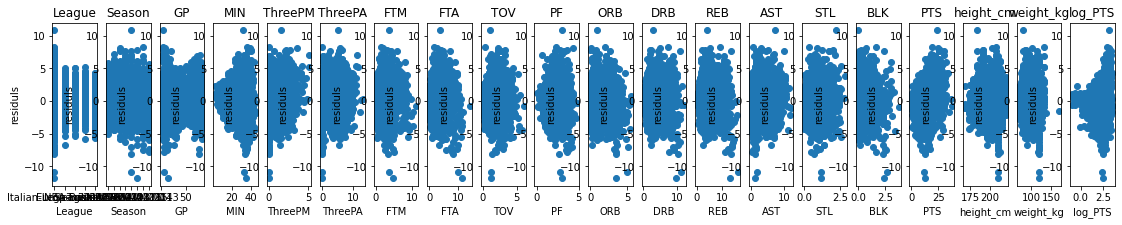

In [53]:
# weighted least squares: optional
plt.figure(figsize=(20, 3))

# i: index
for i, col in enumerate(df_standardized.columns):
    plt.subplot(1, 21, i+1)
    x = df_standardized[col]
    y = model.resid
    plt.plot(x, y, 'o')

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('residuls')

Text(0.5, 1.0, 'Fitted Values vs. Residuals after log transformation on y')

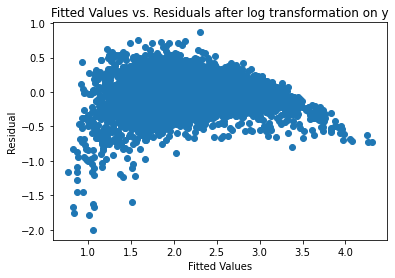

In [54]:
p1 = model_1.fittedvalues
res1 = model_1.resid
plt.scatter(p1,res1)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals after log transformation on y")

## try delete influential points

In [55]:
df_test = df_standardized.drop(delete, axis = 0)

In [56]:
#df_test_2 = df_standardized[~df_standardized.index.isin(delete)]

In [57]:
model_2 =smf.ols('log_PTS~ C(League)+C(Season)+GP+ThreePA+FTA+TOV+PF+DRB+AST+STL+BLK+height_cm+weight_kg',data=df_test).fit()

Text(0.5, 1.0, 'Fitted Values vs. Residuals after log transformation on y and deleting IP')

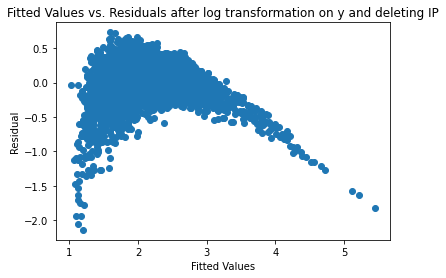

In [58]:
p1 = model_2.fittedvalues
res1 = model_2.resid
plt.scatter(p1,res1)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals after log transformation on y and deleting IP")

In [59]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model_2.resid, model_2.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 375.3588970538561, 'LM-Test p-value': 4.896647877381167e-66}


## try use robust standard error

In [60]:
model_3 =smf.ols('log_PTS~ C(League)+C(Season)+GP+ThreePA+FTA+TOV+MIN+PF+DRB+AST+STL+BLK+height_cm+weight_kg',data=df_test).fit(cov_type='HC1')
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_PTS   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     664.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:07:04   Log-Likelihood:                 625.45
No. Observations:                6865   AIC:                            -1203.
Df Residuals:                    6841   BIC:                            -1039.
Df Model:                          23                                         
Covariance Type:                  HC1                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.4330      0.122      3.547      0.000       0.194       0.672
C(League)[T.Italian-Lega-Basket-Serie-A]    -0.0550      0.010     -5.392      0.000      -0.075      -0.035
C(League)[T.NBA]                            -0.1074      0.010    -10.595      0.000      -0.127      -0.088
C(League)[T.Spanish-ACB]                     0.0124      0.009      1.351      0.177      -0.006       0.030
C(League)[T.Turkish-BSL]                    -0.0350      0.010     -3.333      0.001      -0.056      -0.014
C(Season)[T.2013 - 2014]                     0.0211      0.012      1.820      0.069      -0.002       0.044
C(Season)[T.2014 - 2015]                     0.0431      0.011      3.952      0.000       0.022       0.065
C(Season)[T.2015 - 2016]                     0.0250      0.011      2.182      0.029       0.003       0.047
C(Season)[T.2016 - 2017]                     0.0547      0.011      4.880      0.000       0.033       0.077
C(Season)[T.2017 - 2018]                     0.0812      0.011      7.198      0.000       0.059       0.103
C(Season)[T.2018 - 2019]                     0.0856      0.011      7.603      0.000       0.064       0.108
C(Season)[T.2019 - 2020]                     0.0453      0.012      3.705      0.000       0.021       0.069
GP                                           0.0025      0.000     15.762      0.000       0.002       0.003
ThreePA                                      0.0491      0.002     23.582      0.000       0.045       0.053
FTA                                          0.1125      0.003     35.851      0.000       0.106       0.119
TOV                                          0.0804      0.007     10.907      0.000       0.066       0.095
MIN                                          0.0446      0.001     41.682      0.000       0.042       0.047
PF                                           0.0095      0.006      1.651      0.099      -0.002       0.021
DRB                                         -0.0018      0.003     -0.564      0.573      -0.008       0.004
AST                                         -0.0319      0.003    -10.632      0.000      -0.038      -0.026
STL                                         -0.0693      0.009     -8.083      0.000      -0.086      -0.052
BLK                                          0.0189      0.008      2.248      0.025       0.002       0.035
height_cm                                 9.097e-05      0.001      0.139      0.889      -0.001       0.001
weight_kg                                    0.0018      0.000      3.972      0.000       0.001       0.003
==============================================================================
Omnibus:                     2015.434   Durbin-Watson:       

Text(0.5, 1.0, 'Fitted Values vs. Residuals after log, delete IP and robust SE')

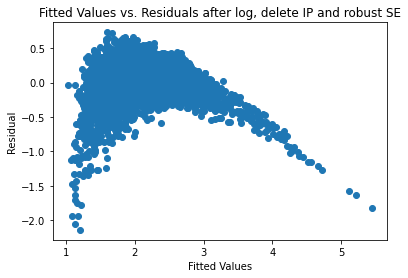

In [61]:
p3 = model_3.fittedvalues
res3 = model_3.resid
plt.scatter(p1,res1)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals after log, delete IP and robust SE")

In [62]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model_3.resid, model_3.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 644.3772279814141, 'LM-Test p-value': 2.234788914444263e-121}


## Normality check

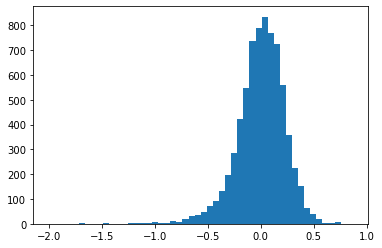

In [63]:
plt.hist(model_1.resid,bins=50)
plt.show()

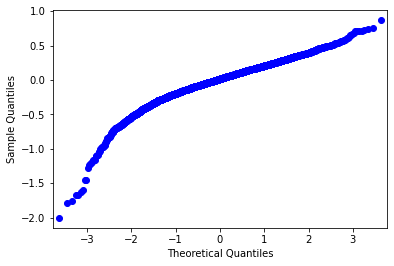

In [64]:
sm.qqplot(model_1.resid);

__more or less close to diagonal__

In [65]:
# run the Jarque-Bera test on the residuals
import statsmodels.stats.api as sms
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model_1.resid)
for name_, value in (zip(name, test)):
    print(name_, value)

Jarque-Bera 9329.204844616355
Chi^2 two-tail prob. 0.0
Skew -1.1421868678062217
Kurtosis 8.073597069790333


### try delete outliers

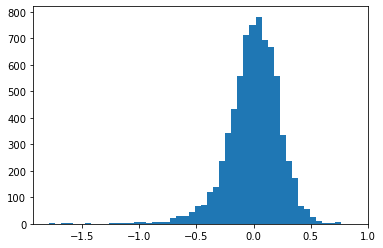

In [66]:
test = model_1.resid[abs(model_1.resid)<=2]

plt.hist(test,bins=50)
plt.show()

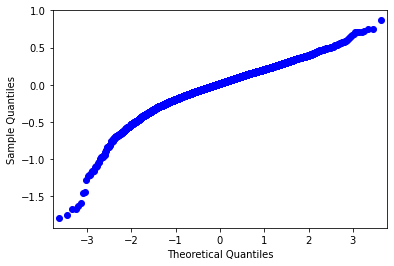

In [67]:
sm.qqplot(test);

In [68]:
# run the Jarque-Bera test on the residuals
import statsmodels.stats.api as sms
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(test)
for name_, value in (zip(name, test)):
    print(name_, value)

Jarque-Bera 7390.14663011301
Chi^2 two-tail prob. 0.0
Skew -1.0732924320940957
Kurtosis 7.463226179677984


p_value < 0.05, so we reject the null hypothesis that residuals follow normality.  
We conclude that residuals don't follow normality.

In [69]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_PTS   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1346.
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:07:05   Log-Likelihood:                 308.96
No. Observations:                7232   AIC:                            -569.9
Df Residuals:                    7208   BIC:                            -404.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.3682      0.108      3.394      0.001       0.156       0.581
C(League)[T.Italian-Lega-Basket-Serie-A]    -0.0501      0.011     -4.759      0.000      -0.071      -0.029
C(League)[T.NBA]                            -0.1130      0.009    -12.538      0.000      -0.131      -0.095
C(League)[T.Spanish-ACB]                     0.0132      0.009      1.391      0.164      -0.005       0.032
C(League)[T.Turkish-BSL]                    -0.0329      0.010     -3.168      0.002      -0.053      -0.013
C(Season)[T.2013 - 2014]                     0.0263      0.011      2.342      0.019       0.004       0.048
C(Season)[T.2014 - 2015]                     0.0534      0.011      4.732      0.000       0.031       0.075
C(Season)[T.2015 - 2016]                     0.0372      0.011      3.297      0.001       0.015       0.059
C(Season)[T.2016 - 2017]                     0.0641      0.011      5.704      0.000       0.042       0.086
C(Season)[T.2017 - 2018]                     0.0898      0.011      8.066      0.000       0.068       0.112
C(Season)[T.2018 - 2019]                     0.0996      0.011      8.836      0.000       0.078       0.122
C(Season)[T.2019 - 2020]                     0.0595      0.011      5.417      0.000       0.038       0.081
GP                                           0.0027      0.000     19.332      0.000       0.002       0.003
ThreePA                                      0.0477      0.002     23.742      0.000       0.044       0.052
FTA                                          0.1061      0.003     38.336      0.000       0.101       0.112
TOV                                          0.0764      0.007     10.228      0.000       0.062       0.091
MIN                                          0.0454      0.001     53.317      0.000       0.044       0.047
PF                                           0.0085      0.005      1.563      0.118      -0.002       0.019
DRB                                         -0.0059      0.003     -1.834      0.067      -0.012       0.000
AST                                         -0.0284      0.003     -9.176      0.000      -0.035      -0.022
STL                                         -0.0675      0.009     -7.291      0.000      -0.086      -0.049
BLK                                          0.0089      0.009      0.949      0.343      -0.009       0.027
height_cm                                    0.0003      0.001      0.474      0.636      -0.001       0.002
weight_kg                                    0.0020      0.000      4.588      0.000       0.001       0.003
==============================================================================
Omnibus:                     1850.880   Durbin-Watson:       

# Model Selection

__Based on the individual t test above, I decide to remove PF, DRB, BLK and height_cm since they are not significant predictors.__

## Step 1: Best subset with adj-R2 and Mallow’s Cp to give a list of candidates.

In [70]:
full_model = 'log_PTS ~ C(League)+C(Season)+GP+ThreePA+FTA+TOV+MIN+AST+STL+weight_kg'

In [71]:
predictors = full_model.split(' ~ ')[1].split('+')
predictors

['C(League)',
 'C(Season)',
 'GP',
 'ThreePA',
 'FTA',
 'TOV',
 'MIN',
 'AST',
 'STL',
 'weight_kg']

In [72]:
def calculator(predictors):  
    model = smf.ols('log_PTS~'+'+'.join(comb_pred), data=df_standardized).fit()
    n = int(model.nobs)
    
    # get predictors in the candidate_model
    #predictors = candidate_model.split('~')[1].split('+')
    #predictors = [predictor.strip() for predictor in predictors]
    num_predictors = len(predictors)
    k = num_predictors + 1   # number of parameters
    
    # get adj_r2
    adj_r2 = model.rsquared_adj                 
    
    # get SSE_candidate  
    SSE_candidate = model.mse_resid * (n-k)
    
    # get Mallow's Cp
    Cp = SSE_candidate / MSE_full - (n-2*k)
    
    return {'number of predictors': num_predictors, 'adj_R2': adj_r2, "Mallow's_Cp": Cp, 'predictors': ', '.join(predictors)}

In [73]:
def MSE_full_calculator(full_model):
    model = smf.ols(full_model, data=df_standardized).fit()
    return model.mse_resid

MSE_full = MSE_full_calculator(full_model)
MSE_full

0.05395213141721023

In [74]:
from itertools import combinations

best_subsets = pd.DataFrame(columns = ['number of predictors', 'adj_R2', "Mallow's_Cp", 'predictors']) 
for n_pred in range(1, len(predictors)+1):
    comb = combinations(predictors, n_pred)  # get all the combinations of predictors (each one is of length n)
    for comb_pred in list(comb):
        performance = calculator(comb_pred) 
        if performance["Mallow's_Cp"] > 200:
            continue            
        best_subsets = best_subsets.append(performance, ignore_index=True)

In [75]:
pd.set_option("display.max_colwidth", None)  # display the full text of a pandas DataFrame
best_subsets

,number of predictors,adj_R2,Mallow's_Cp,predictors
0,8,0.807789,112.105923,"C(League), C(Season), GP, ThreePA, FTA, TOV, MIN, AST"
1,8,0.805637,194.135765,"C(League), C(Season), GP, ThreePA, FTA, TOV, MIN, weight_kg"
2,8,0.806005,180.116873,"C(League), C(Season), GP, ThreePA, FTA, MIN, AST, STL"
3,8,0.806245,170.956951,"C(League), C(Season), GP, ThreePA, FTA, MIN, AST, weight_kg"
4,8,0.806867,147.241121,"C(League), C(Season), GP, ThreePA, FTA, MIN, STL, weight_kg"
5,8,0.806542,159.643081,"C(League), GP, ThreePA, FTA, TOV, MIN, AST, STL"
6,8,0.806104,176.337174,"C(League), GP, ThreePA, FTA, TOV, MIN, AST, weight_kg"
7,8,0.805502,199.271497,"C(League), GP, ThreePA, FTA, TOV, MIN, STL, weight_kg"
8,9,0.809450,49.786098,"C(League), C(Season), GP, ThreePA, FTA, TOV, MIN, AST, STL"
9,9,0.809130,62.007109,"C(League), C(Season), GP, ThreePA, FTA, TOV, MIN, AST, weight_kg"


__Although we have at maximum 2^p models to choose from, most of them have a Mallow's Cp that is far away from k (where k is the number of parameters for the model). When we set the criteria that Mallow's Cp <= 200. We only get a small list of candidate models as above.  
Then, since all of the models above have closed adjusted R square, for the same number of predictors, we choose the model with the smallest Mallow's Cp.   
Our candidate list is:__

In [76]:
candidates = ['log_PTS~C(League)+C(Season)+GP+ThreePA+FTA+TOV+MIN+AST', 
              'log_PTS~C(League)+C(Season)+GP+ThreePA+FTA+TOV+MIN+AST+STL',
              'log_PTS~C(League)+C(Season)+GP+ThreePA+FTA+TOV+MIN+AST+STL+weight_kg']

## Step 2: AIC/BIC on all candidates to find the one with the smallest value.

In [77]:
def calculator_AIC_BIC(model_name): 
    model = smf.ols(model_name, data=df_standardized).fit()
    AIC = model.aic
    BIC = model.bic
    return {'model': model_name, 'AIC': AIC, 'BIC': BIC}

In [78]:
aic_bic_table = pd.DataFrame(columns = ['model', 'AIC', 'BIC']) 
for model in candidates:
    model_result = calculator_AIC_BIC(model)
    aic_bic_table = aic_bic_table.append(model_result, ignore_index=True)

aic_bic_table

,model,AIC,BIC
0,log_PTS~C(League)+C(Season)+GP+ThreePA+FTA+TOV+MIN+AST,-470.958219,-347.005343
1,log_PTS~C(League)+C(Season)+GP+ThreePA+FTA+TOV+MIN+AST+STL,-532.733451,-401.894304
2,log_PTS~C(League)+C(Season)+GP+ThreePA+FTA+TOV+MIN+AST+STL+weight_kg,-571.468002,-433.742584


__chose the one with the smallest AIC and BIC, which is__

In [79]:
final_choice = 'log_PTS~C(League)+C(Season)+GP+ThreePA+FTA+TOV+MIN+AST+STL+weight_kg'

## Step 3: Then look into the t-test result to check significance of each predictors.

In [80]:
final_model = smf.ols(final_choice, data=df_standardized).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_PTS   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     1629.
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:07:41   Log-Likelihood:                 305.73
No. Observations:                7232   AIC:                            -571.5
Df Residuals:                    7212   BIC:                            -433.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.4417      0.033     13.382      0.000       0.377       0.506
C(League)[T.Italian-Lega-Basket-Serie-A]    -0.0520      0.010     -4.973      0.000      -0.073      -0.032
C(League)[T.NBA]                            -0.1145      0.009    -12.898      0.000      -0.132      -0.097
C(League)[T.Spanish-ACB]                     0.0129      0.009      1.365      0.172      -0.006       0.032
C(League)[T.Turkish-BSL]                    -0.0334      0.010     -3.223      0.001      -0.054      -0.013
C(Season)[T.2013 - 2014]                     0.0265      0.011      2.359      0.018       0.004       0.049
C(Season)[T.2014 - 2015]                     0.0535      0.011      4.754      0.000       0.031       0.075
C(Season)[T.2015 - 2016]                     0.0368      0.011      3.275      0.001       0.015       0.059
C(Season)[T.2016 - 2017]                     0.0634      0.011      5.668      0.000       0.041       0.085
C(Season)[T.2017 - 2018]                     0.0891      0.011      8.061      0.000       0.067       0.111
C(Season)[T.2018 - 2019]                     0.0989      0.011      8.878      0.000       0.077       0.121
C(Season)[T.2019 - 2020]                     0.0578      0.011      5.333      0.000       0.037       0.079
GP                                           0.0026      0.000     19.325      0.000       0.002       0.003
ThreePA                                      0.0474      0.002     25.349      0.000       0.044       0.051
FTA                                          0.1056      0.003     38.716      0.000       0.100       0.111
TOV                                          0.0779      0.007     10.737      0.000       0.064       0.092
MIN                                          0.0452      0.001     62.008      0.000       0.044       0.047
AST                                         -0.0297      0.003    -10.133      0.000      -0.035      -0.024
STL                                         -0.0666      0.009     -7.276      0.000      -0.085      -0.049
weight_kg                                    0.0020      0.000      6.383      0.000       0.001       0.003
==============================================================================
Omnibus:                     1880.122   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9620.172
Skew:                          -1.157   Prob(JB):                         0.00
Kurtosis:                       8.155   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

__All predictors in our final model have a p-value that is less than 0.05. So we conclude that all predictors are significant for the model.__

# Model diagnostics for the final model

## Multicollinearity

In [81]:
y, X = dmatrices(final_choice, data=df_standardized, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

    VIF Factor                                  features
0   146.018798                                 Intercept
1     1.592967  C(League)[T.Italian-Lega-Basket-Serie-A]
2     2.566715                          C(League)[T.NBA]
3     1.636663                  C(League)[T.Spanish-ACB]
4     1.493239                  C(League)[T.Turkish-BSL]
5     1.753414                  C(Season)[T.2013 - 2014]
6     1.755876                  C(Season)[T.2014 - 2015]
7     1.754783                  C(Season)[T.2015 - 2016]
8     1.790308                  C(Season)[T.2016 - 2017]
9     1.845581                  C(Season)[T.2017 - 2018]
10    1.856199                  C(Season)[T.2018 - 2019]
11    2.000905                  C(Season)[T.2019 - 2020]
12    1.337385                                        GP
13    1.822668                                   ThreePA
14    2.423867                                       FTA
15    3.820666                                       TOV
16    3.357606                 

## Check influential points

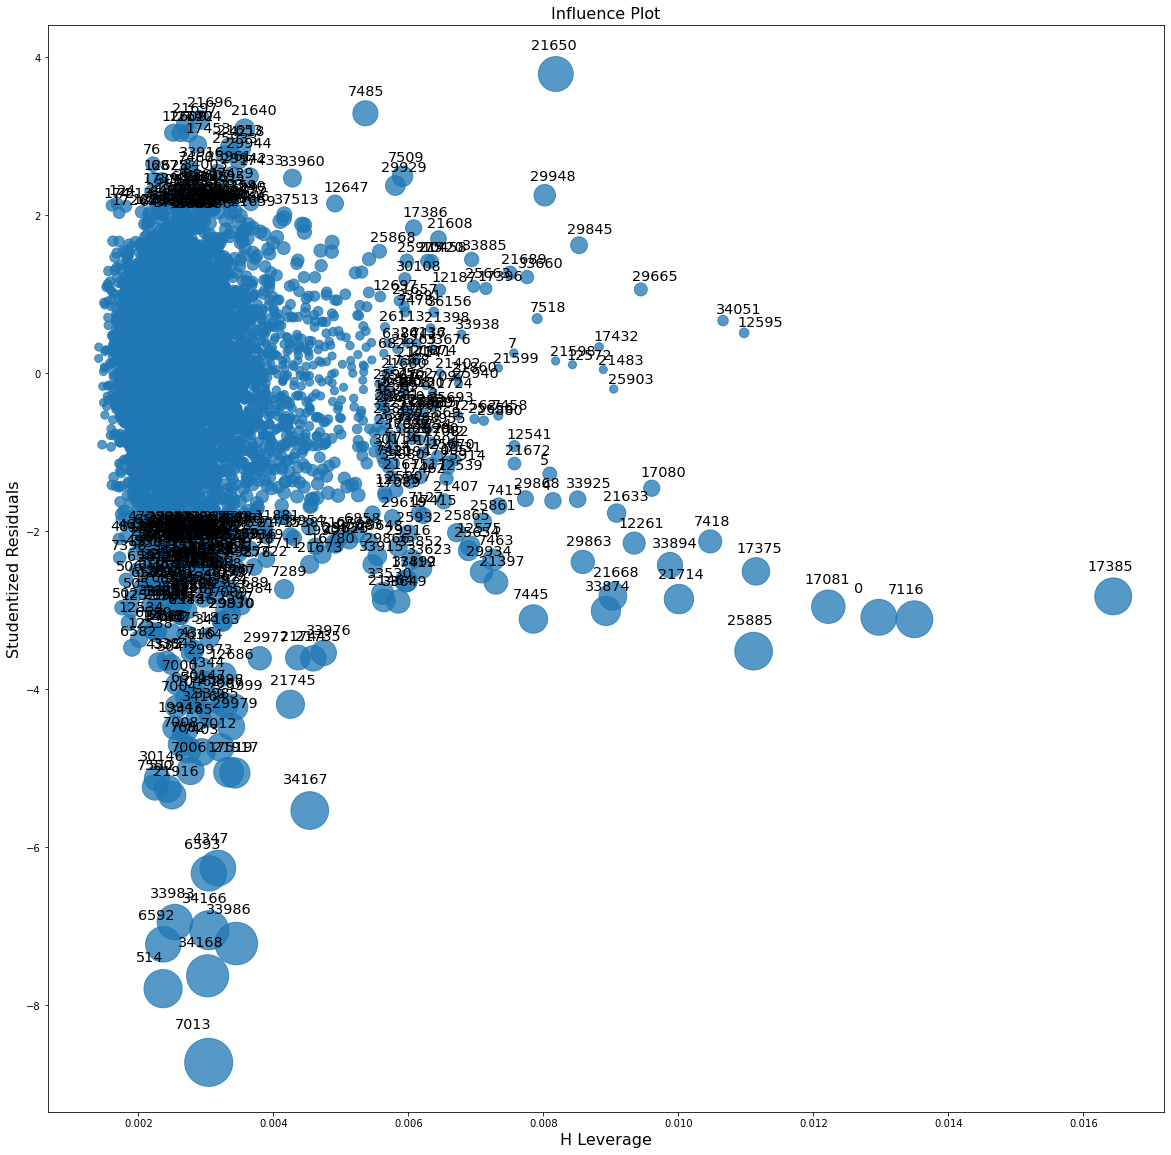

In [82]:
#graphical representation of the influences()
fig, ax = plt.subplots(figsize=(20,20))
fig=sm.graphics.influence_plot(final_model,ax=ax, criterion="cooks") 

In [83]:
# threshold externally studentized residuals to identify influential points
import scipy
n = len(df_standardized)
p = len(final_model.params)
alpha = 0.05

# get the critical value
threshold_stud = scipy.stats.t.ppf(1-alpha/2, df=n-p-1)  

# get a list of studs(e_i), i = 1, 2, ..., n
infl = final_model.get_influence()
reg_studs = infl.resid_studentized_external         

# get a list of boolean value, indicating if studs(e_i) > threshold_stud
atyp_stud = np.abs(reg_studs) > threshold_stud           

# which ones?
obs_numbers_studs = df_standardized.index[atyp_stud]  # observation numbers
studs_res = reg_studs[atyp_stud]         # external studentized residual values
#orig_res = res[atyp_stud].values         # original residual values

d = {'index': obs_numbers_studs, 'studentized residual': studs_res}
df_display = pd.DataFrame(d)
df_display.set_index('index')

,studentized residual
index,
0,-3.088471
76,2.644078
124,2.150571
174,2.124277
179,-2.734126
...,...
37337,-1.979200
37502,2.017806
37513,2.008728


In [84]:
# Cook's distance: no flags, this is a pretty "loose" rule
inflsum = infl.summary_frame()
reg_cook = inflsum.cooks_d           # cook's distance value
atyp_cook = np.abs(reg_cook) >= 4/n  # identity the observations that might be influential

# which ones?
obs_numbers_cook = df_standardized.index[atyp_cook]  # observation numbers
obs_cook = reg_cook[atyp_cook]          # cook's distances of influential points

d = {'index': obs_numbers_cook, "cook's distances": obs_cook}
df_display = pd.DataFrame(d)
df_display.set_index('index')

,cook's distances
index,
0,0.006260
4,0.001069
5,0.000663
76,0.000776
179,0.001261
...,...
34168,0.008754
37502,0.000562
37513,0.000843


## try delete influential points

In [85]:
# find the index of those observations that were both identified as influential points 
# from externally studentized residuals and Cook's distance
delete = obs_numbers_studs & obs_numbers_cook
delete

Int64Index([    0,    76,   179,   295,   361,   465,   498,   502,   504,
              505,
            ...
            34163, 34164, 34165, 34166, 34167, 34168, 37502, 37513, 37574,
            37578],
           dtype='int64', length=293)

In [86]:
df_test = df_standardized.drop(delete, axis = 0)

In [87]:
final_model_2 = smf.ols(final_choice, data=df_test).fit()

Text(0.5, 1.0, 'Fitted Values vs. Residuals after log transformation on y')

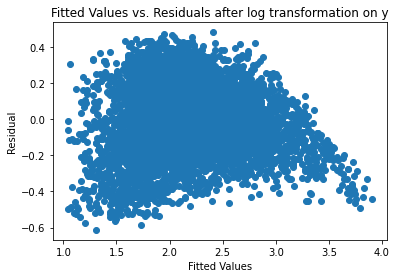

In [88]:
p1 = final_model_2.fittedvalues
res1 = final_model_2.resid
plt.scatter(p1,res1)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals after log transformation on y")

## Hetereoscedasticity

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

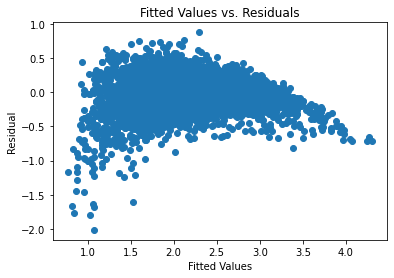

In [89]:
p = final_model.fittedvalues
res = final_model.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

In [90]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(final_model.resid, final_model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 586.6777664207078, 'LM-Test p-value': 3.260586841250536e-112}


## Normality check

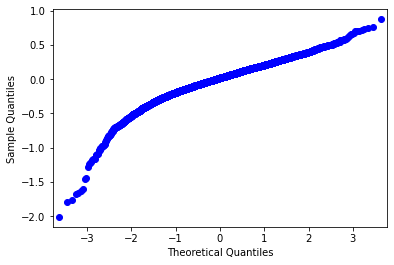

In [91]:
sm.qqplot(final_model.resid);

In [92]:
# run the Jarque-Bera test on the residuals
import statsmodels.stats.api as sms
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(final_model.resid)
for name_, value in (zip(name, test)):
    print(name_, value)

Jarque-Bera 9620.172367248251
Chi^2 two-tail prob. 0.0
Skew -1.1570120660743943
Kurtosis 8.154671967458198


# do some prediction work

In [112]:
new_data = pd.DataFrame(data = [['NBA', '2014 - 2015', 69, 7.88, 9.99, 4.56, 33.33, 9.13, 1.11, 99.0],
                                ['Spanish-ACB', '2019 - 2020', 62, 7.80, 9.0, 3.67, 44.44, 8.15, 1.21, 109.0]], 
                       columns = ['League', 'Season', 'GP', 'ThreePA', 'FTA', 'TOV', 'MIN', 'AST', 'STL', 'weight_kg']) 
new_data

,League,Season,GP,ThreePA,FTA,TOV,MIN,AST,STL,weight_kg
0,NBA,2014 - 2015,69,7.88,9.99,4.56,33.33,9.13,1.11,99.0
1,Spanish-ACB,2019 - 2020,62,7.80,9.00,3.67,44.44,8.15,1.21,109.0


In [113]:
prediction = final_model.get_prediction(exog=dict(new_data))
pred_table = prediction.summary_frame(alpha=0.05)
pred_table

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.703837,0.022189,3.660339,3.747335,3.246435,4.161239
1,4.183837,0.020604,4.143447,4.224226,3.726720,4.640953
